In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
from read_data import get_network_df, get_corrs, get_full_df
from numba.core import types
import graph_tool
import numba

from numba import njit
from graph_tool.topology import shortest_distance
import pandas as pd
import networkx as nx
import graph_tool as gt
from graph_tool.topology import shortest_distance
import numpy as np
import typing

import numba
from numba.core import types

from transport_problem import OptimParams, DualOracle, HyperParams
from subgd import OracleStacker, ustm_mincost_mcf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
T_LEN = 76
LA_LEN = 25
MU_LEN = 25

In [16]:
net_df = get_network_df(Path('SiouxFalls') / 'SiouxFalls_net.tntp')
corrs = get_corrs(Path('SiouxFalls') / 'SiouxFalls_trips.tntp') 
corrs = corrs / corrs.sum()

graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])
graph.ep.capacity.a = graph.ep.capacity.a / corrs.sum() 

# from graph_tool.draw import graph_draw
# graph_draw(graph)


In [17]:
net_df = get_network_df(Path('SiouxFalls') / 'SiouxFalls_net.tntp')
corrs = get_corrs(Path('SiouxFalls') / 'SiouxFalls_trips.tntp')
corrs = corrs / corrs.sum()

graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])
graph.ep.capacity.a = graph.ep.capacity.a / corrs.sum()

# from graph_tool.draw import graph_draw
# graph_draw(graph)


In [ ]:
from transport_problem import HyperParams, DualOracle, OptimParams
l = np.sum(corrs, axis=1)
w = np.sum(corrs, axis=0)

zones_num = len(l)
sources = np.arange(zones_num)
targets = np.arange(zones_num)

params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)
oracle = DualOracle(graph, net_df, l, w, params)
oracle_stacker = OracleStacker(oracle, graph, sources, targets)

In [ ]:
t, flows_history, flows_averaged, d_history, d_avaraged, history_prime_values, history_dual_values, dgap_log,\
           cons_log, A_log, history_dual_values, history_prime_values = ustm_mincost_mcf(oracle_stacker,  eps_abs=1e-2, eps_cons_abs=1e-6, max_iter=600, stop_by_crit=False)

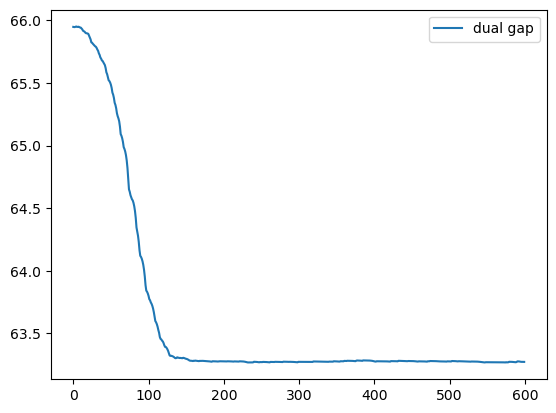

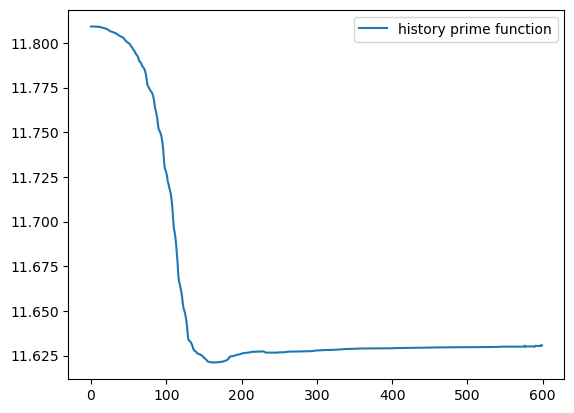

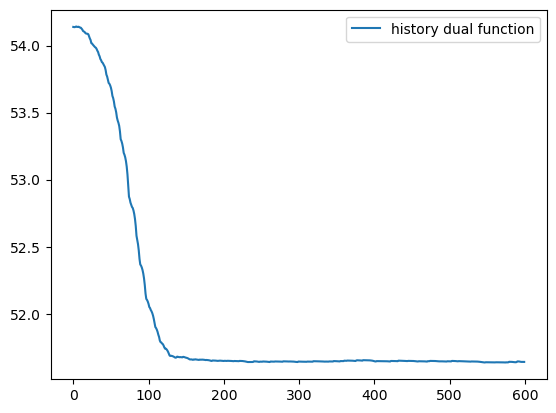

In [24]:
plt.plot(dgap_log, label="dual gap")
plt.legend()
plt.show()

plt.plot(history_prime_values, label="history prime function")
plt.legend()
plt.show()

plt.plot(history_dual_values, label="history dual function")
plt.legend()
plt.show()

In [10]:
# расчет прямой функции
vars = np.zeros(oracle_stacker.parameters_vector_size)  # dual costs w
_ = oracle_stacker(vars)
print("prime function value: ", oracle_stacker.get_prime_value())

vars block grad:  0.0
t in optim params grad:  0.0 0.0
la in optim params grad:  26.219936940859927
mu in optim params grad:  26.261383907437413
norm T:  0.0
grad dF dla:  0.12239030463886905
grad dF dmu:  0.1221871790671455
prime function value:  19.05361456152633


In [ ]:
# расчет прямой функции
vars = np.zeros(oracle_stacker.parameters_vector_size)  # dual costs w
_ = oracle_stacker(vars)
print("prime function value: ", oracle_stacker.get_prime_value())